#📌 Extracción

#🔧 Transformación

In [ ]:
import pandas as pd
import requests

# URL RAW del JSON
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'

# Descargar y cargar el contenido correctamente
response = requests.get(url)

if response.status_code == 200:
    try:
        # Cargar contenido como lista de diccionarios
        data = response.json()

        # Aplanar estructura anidada
        df = pd.json_normalize(data)

        print("✅ Datos cargados correctamente:")
        print(df.head())
    except ValueError as e:
        print(f"❌ Error al parsear JSON: {e}")
else:
    print(f"❌ Error al descargar el archivo: código {response.status_code}")



✅ Datos cargados correctamente:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   



Explorar las columnas del dataset y verificar sus tipos de datos.

#📊 Carga y análisis

In [ ]:
print(df.columns)


Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')


In [ ]:
import pandas as pd
url_diccionario = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_diccionario.md'

diccionario_texto = pd.read_table(url_diccionario, sep="|", skiprows=2, skipinitialspace=True, engine="python")
diccionario_texto.columns = [col.strip() for col in diccionario_texto.columns]
diccionario_texto = diccionario_texto.dropna(axis=1, how='all')
diccionario_texto = diccionario_texto.dropna(how='all')

# Mostrar el DataFrame limpio
print(diccionario_texto.head())


  - `customerID`: número de identificación único de cada cliente
0      - `Churn`: si el cliente dejó o no la empresa            
1          - `gender`: género (masculino y femenino)            
2  - `SeniorCitizen`: información sobre si un cli...            
3   - `Partner`: si el cliente tiene o no una pareja            
4  - `Dependents`: si el cliente tiene o no depen...            


In [ ]:
import pandas as pd

# Asegurar que 'account.Charges.Total' sea numérico
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Variables numéricas más correlacionadas con Churn
# Primero convertimos Churn a binaria
df['Churn_bin'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Correlaciones numéricas
print(df.corr(numeric_only=True)['Churn_bin'].sort_values(ascending=False))
# Comparar medias de variables numéricas por churn
print(df.groupby('Churn')[['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']].mean())



Churn_bin                  1.000000
account.Charges.Monthly    0.193356
customer.SeniorCitizen     0.150889
account.Charges.Total     -0.199484
customer.tenure           -0.352229
Name: Churn_bin, dtype: float64
       customer.tenure  account.Charges.Monthly  account.Charges.Total
Churn                                                                 
             31.571429                63.412277            2196.933705
No           37.569965                61.265124            2555.344141
Yes          17.979133                74.441332            1531.796094


In [ ]:
columnas_relevantes = [
    'Churn',
    'customer.tenure',
    'account.Contract',
    'account.PaymentMethod',
    'account.Charges.Monthly',
    'account.Charges.Total',
    'internet.OnlineSecurity',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.PaperlessBilling'
]


🔎 Valores ausentes (nulos)

🔁 Duplicados

❌ Errores de formato (números como texto)

⚠️ Inconsistencias en categorías (como "Yes", "yes", "YES")

In [ ]:
# Cantidad de valores nulos por columna
nulos = df.isnull().sum()
print(nulos[nulos > 0].sort_values(ascending=False))
# ¿Hay filas duplicadas?
print("Duplicados:", df.duplicated().sum())
# Revisar si columnas numéricas tienen tipo 'object' (posibles errores)
print("Columnas numéricas con mal formato:")
print(df.dtypes[df.dtypes == 'object'])

# Intentar convertir 'account.Charges.Total' a numérico
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
print("Valores no convertidos (nulos inducidos):", df['account.Charges.Total'].isnull().sum())
for col in columnas_relevantes:
    print(f"\n{col}:")
    print(df[col].value_counts(dropna=False))

Churn_bin                224
account.Charges.Total     11
dtype: int64
Duplicados: 0
Columnas numéricas con mal formato:
customerID                   object
Churn                        object
customer.gender              object
customer.Partner             object
customer.Dependents          object
phone.PhoneService           object
phone.MultipleLines          object
internet.InternetService     object
internet.OnlineSecurity      object
internet.OnlineBackup        object
internet.DeviceProtection    object
internet.TechSupport         object
internet.StreamingTV         object
internet.StreamingMovies     object
account.Contract             object
account.PaperlessBilling     object
account.PaymentMethod        object
dtype: object
Valores no convertidos (nulos inducidos): 11

Churn:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

customer.tenure:
customer.tenure
1     634
72    369
2     246
3     207
4     185
     ... 
28     60
39     59
44     54
36     5

Limpieza del dataframe


In [ ]:
df = df.drop_duplicates()
# Convertir la columna Total Charges a número
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
cols_binarias = [
    'Churn', 'customer.Partner', 'customer.Dependents',
    'phone.PhoneService', 'phone.MultipleLines',
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
    'account.PaperlessBilling'
]

for col in cols_binarias:
    df[col] = df[col].str.strip().str.title()  # " yes " -> "Yes"
    df = df[df['Churn'].isin(['Yes', 'No'])].copy()
for col in cols_binarias:
    print(f"{col}: {df[col].unique()}")
print(df.isnull().sum()[df.isnull().sum() > 0])
df = df.dropna()


Churn: ['No' 'Yes']
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
phone.PhoneService: ['Yes' 'No']
phone.MultipleLines: ['No' 'Yes' 'No Phone Service']
internet.OnlineSecurity: ['No' 'Yes' 'No Internet Service']
internet.OnlineBackup: ['Yes' 'No' 'No Internet Service']
internet.DeviceProtection: ['No' 'Yes' 'No Internet Service']
internet.TechSupport: ['Yes' 'No' 'No Internet Service']
internet.StreamingTV: ['Yes' 'No' 'No Internet Service']
internet.StreamingMovies: ['No' 'Yes' 'No Internet Service']
account.PaperlessBilling: ['Yes' 'No']
Series([], dtype: int64)


Crear la columna "Cuentas_Diarias". Utilizar la
facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [ ]:
# Crear la columna Cuentas_Diarias
df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30

# Mostrar las primeras filas para verificar
print(df[['account.Charges.Monthly', 'Cuentas_Diarias']].head())

   account.Charges.Monthly  Cuentas_Diarias
0                     65.6         2.186667
1                     59.9         1.996667
2                     73.9         2.463333
3                     98.0         3.266667
4                     83.9         2.796667


Análisis


In [ ]:
# Seleccionar solo columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Estadísticas descriptivas generales
df[numeric_cols].describe()


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Churn_bin,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785,2.159940
std,0.368844,24.545260,30.085974,2266.771362,0.441782,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,0.000000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,2.995417
max,1.000000,72.000000,118.750000,8684.800000,1.000000,3.958333


In [ ]:
# Agrupar por Churn y calcular estadísticas
df.groupby('Churn')[['account.Charges.Monthly', 'customer.tenure', 'Cuentas_Diarias']].agg(['mean', 'median', 'std', 'min', 'max'])

account.Charges.Monthly                                   \
                         mean median        std    min     max   
Churn                                                            
No                  61.307408  64.45  31.094557  18.25  118.75   
Yes                 74.441332  79.65  24.666053  18.85  118.35   

      customer.tenure                           Cuentas_Diarias            \
                 mean median        std min max            mean    median   
Churn                                                                       
No          37.650010   38.0  24.076940   1  72        2.043580  2.148333   
Yes         17.979133   10.0  19.531123   1  72        2.481378  2.655000   

                                     
            std       min       max  
Churn                                
No     1.036485  0.608333  3.958333  
Yes    0.822202  0.628333  3.945000

In [ ]:
print("Distribución de Contract:")
print(df['account.Contract'].value_counts(normalize=True))

Distribución de Contract:
account.Contract
Month-to-month    0.551052
Two year          0.239619
One year          0.209329
Name: proportion, dtype: float64


In [ ]:
# Correlaciones con Churn binaria
df.corr(numeric_only=True)['Churn_bin'].sort_values(ascending=False)

,Churn_bin
Churn_bin,1.000000
Cuentas_Diarias,0.192858
account.Charges.Monthly,0.192858
customer.SeniorCitizen,0.150541
account.Charges.Total,-0.199484
customer.tenure,-0.354049


In [ ]:
print("📊 Análisis descriptivo general:")
print(df.describe())

print("\n📊 Incluyendo variables categóricas:")
print(df.describe(include='all'))

📊 Análisis descriptivo general:
       customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
count             7032.000000      7032.000000              7032.000000   
mean                 0.162400        32.421786                64.798208   
std                  0.368844        24.545260                30.085974   
min                  0.000000         1.000000                18.250000   
25%                  0.000000         9.000000                35.587500   
50%                  0.000000        29.000000                70.350000   
75%                  0.000000        55.000000                89.862500   
max                  1.000000        72.000000               118.750000   

       account.Charges.Total    Churn_bin  Cuentas_Diarias  
count            7032.000000  7032.000000      7032.000000  
mean             2283.300441     0.265785         2.159940  
std              2266.771362     0.441782         1.002866  
min                18.800000     0.000000       

profundizar en el análisis de la variable Churn comparándola con otras variables clave del dataset, como:

-Tipo de contrato (account.Contract)

-Método de pago (account.PaymentMethod)

-Facturación mensual (account.Charges.Monthly)
-Antigüedad (customer.tenure)

-Servicios adicionales (ej: internet.OnlineSecurity, internet.TechSupport, etc.)

Churn vs. Tipo de Contrato

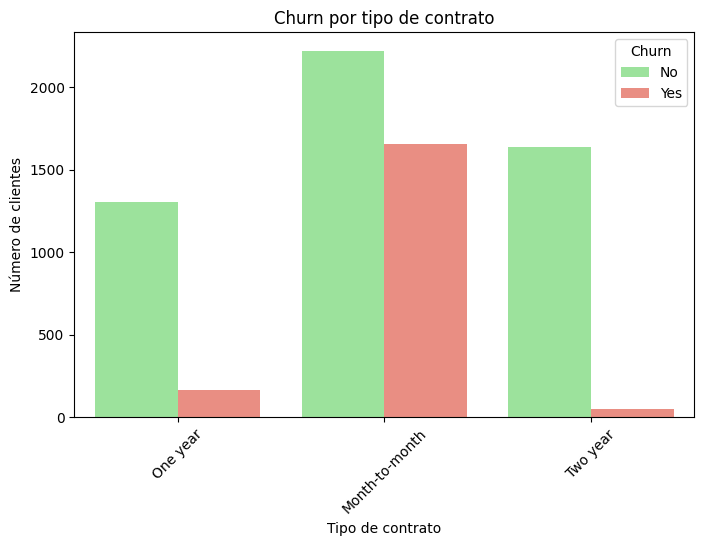

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='account.Contract', hue='Churn', data=df, palette=['lightgreen', 'salmon'])
plt.title('Churn por tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Número de clientes')
plt.xticks(rotation=45)
plt.show()

Comparar Churn vs. Método de Pago
¿Algunos métodos de pago están asociados con mayor o menor probabilidad de abandono?

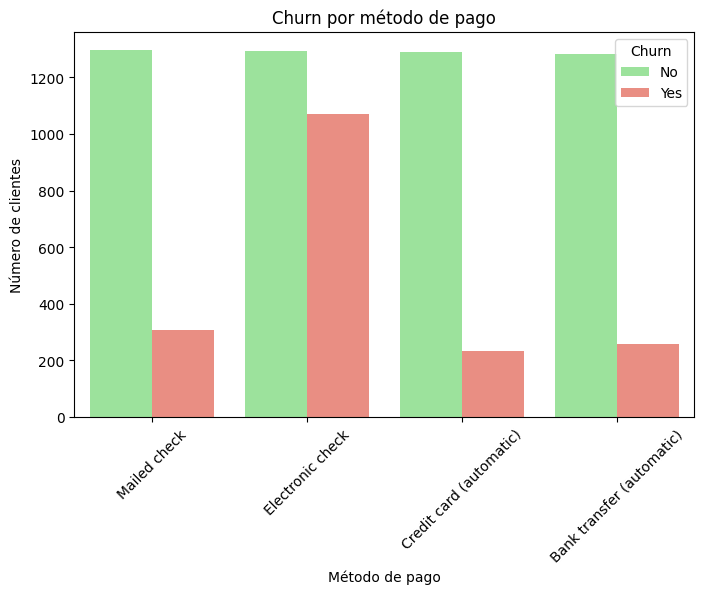

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='account.PaymentMethod', hue='Churn', data=df, palette=['lightgreen', 'salmon'])
plt.title('Churn por método de pago')
plt.xlabel('Método de pago')
plt.ylabel('Número de clientes')
plt.xticks(rotation=45)
plt.show()

Comparar Churn vs. Facturación Mensual: ¿Quienes abandonan pagan más o menos?


<Axes: xlabel='Churn', ylabel='account.Charges.Monthly'>

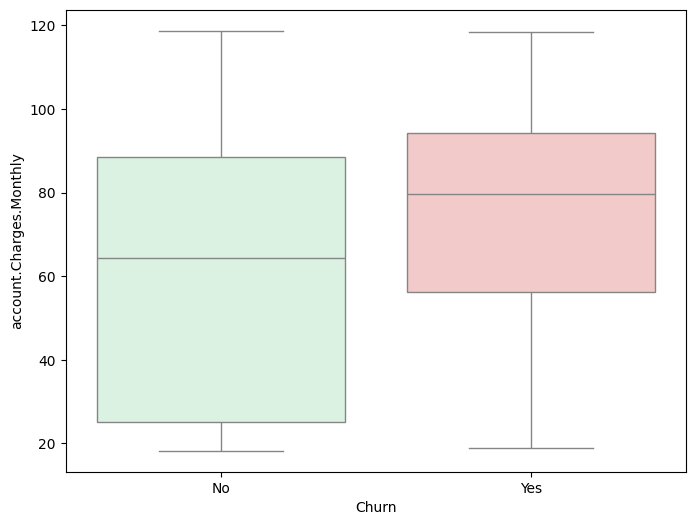

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account.Charges.Monthly',
            data=df,
            hue='Churn',
            palette=['#d7f5e0', '#f9c3c2'])  # tonos pastel

Comparar Churn vs. Antigüedad


<Axes: xlabel='Churn', ylabel='account.Charges.Monthly'>

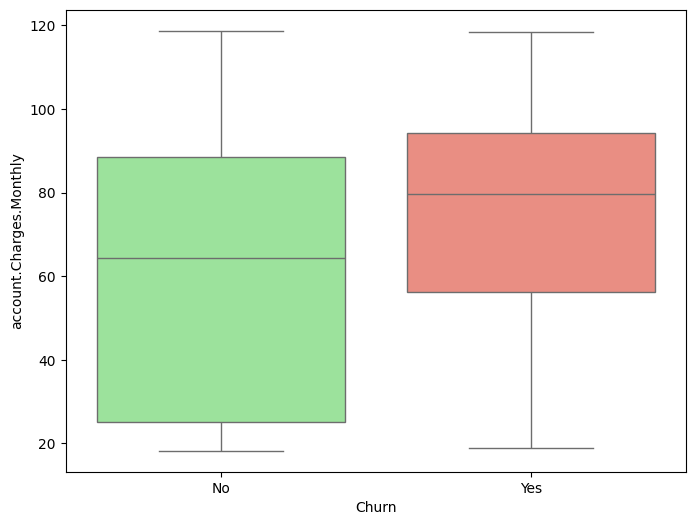

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account.Charges.Monthly', data=df,
            hue='Churn', palette=['lightgreen', 'salmon'], legend=False)

Los clientes que se van suelen tener menor antigüedad.

Comparar Churn vs. Servicios Adicionales (Ejemplo: Online Security)


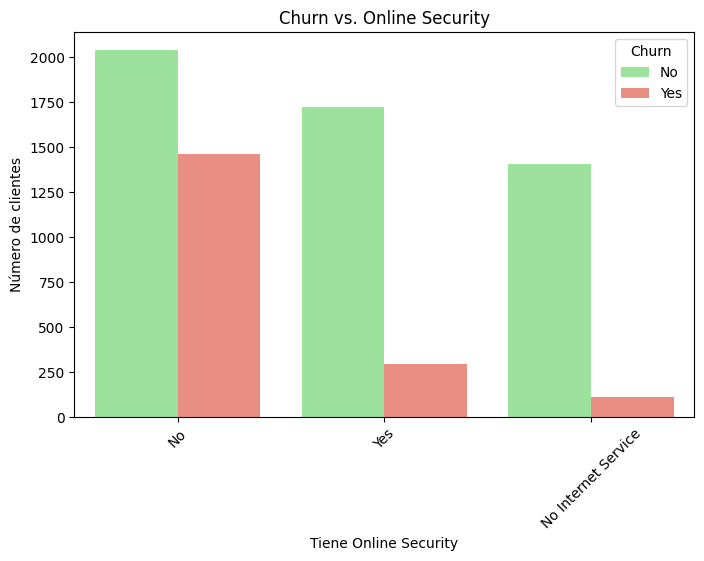

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='internet.OnlineSecurity', hue='Churn', data=df, palette=['lightgreen', 'salmon'])
plt.title('Churn vs. Online Security')
plt.xlabel('Tiene Online Security')
plt.ylabel('Número de clientes')
plt.xticks(rotation=45)
plt.show()

Esto puede sugerir que ofrecer servicios adicionales reduce el Churn.

Tabla de Contingencia para Análisis Cuantitativo

In [ ]:
from pandas import crosstab

# Ejemplo con Contract
tabla_contingencia = crosstab(df['account.Contract'], df['Churn'], margins=True)
print(tabla_contingencia)

# Para ver porcentajes
porcentaje_churn_por_contract = tabla_contingencia.div(tabla_contingencia['All'], axis=0).round(2) * 100
print(porcentaje_churn_por_contract)

Churn               No   Yes   All
account.Contract                  
Month-to-month    2220  1655  3875
One year          1306   166  1472
Two year          1637    48  1685
All               5163  1869  7032
Churn               No   Yes    All
account.Contract                   
Month-to-month    57.0  43.0  100.0
One year          89.0  11.0  100.0
Two year          97.0   3.0  100.0
All               73.0  27.0  100.0


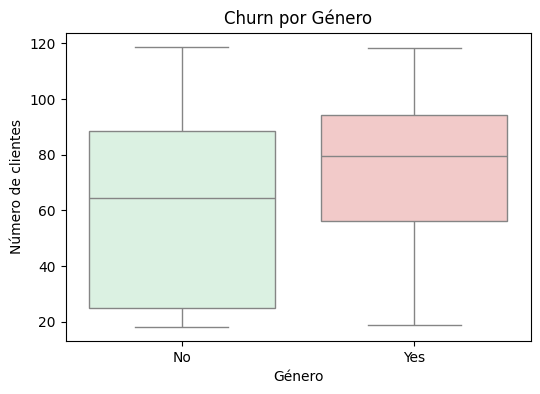

In [ ]:
# Distribución de Churn por Género
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='account.Charges.Monthly',
            data=df,
            hue='Churn',
            palette=['#d7f5e0', '#f9c3c2'])  # tonos pastel
plt.title('Churn por Género')
plt.xlabel('Género')
plt.ylabel('Número de clientes')
plt.show()

 # Distribución de Antigüedad (customer.tenure)

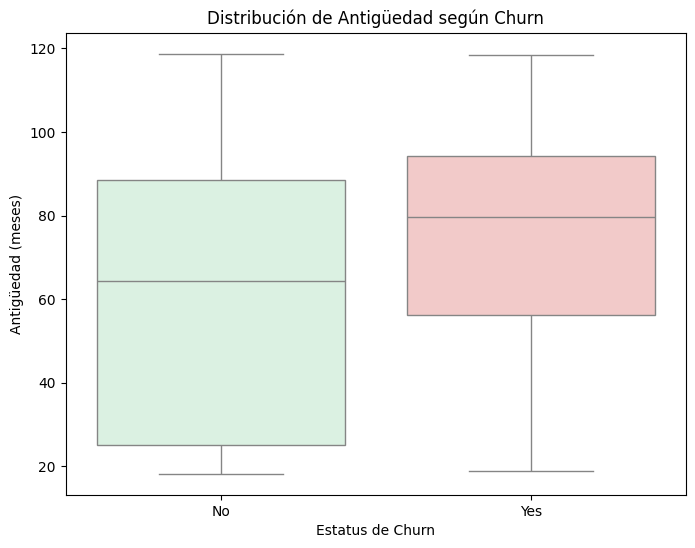

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account.Charges.Monthly',
            data=df,
            hue='Churn',
            palette=['#d7f5e0', '#f9c3c2'])  # tonos pastel
plt.title('Distribución de Antigüedad según Churn')
plt.xlabel('Estatus de Churn')
plt.ylabel('Antigüedad (meses)')
plt.show()

Esto sugiere que la fidelidad está asociada con menos probabilidad de Churn

# Distribución de Facturación Mensual (account.Charges.Monthly)

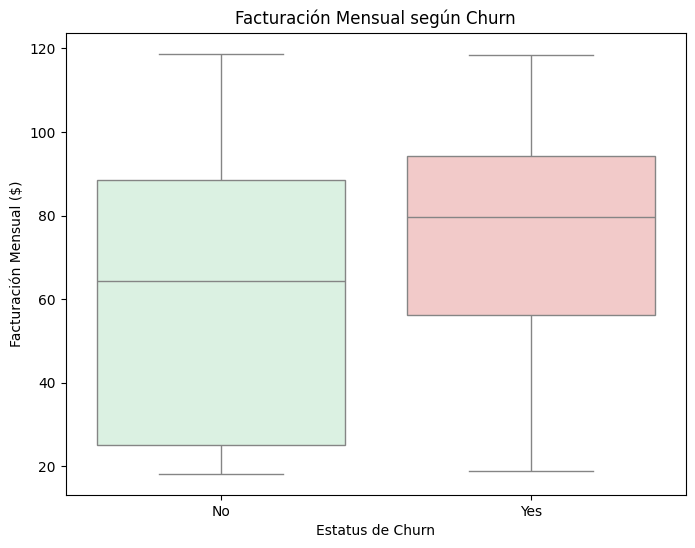

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account.Charges.Monthly',
            data=df,
            hue='Churn',
            palette=['#d7f5e0', '#f9c3c2'])  # tonos pastel
plt.title('Facturación Mensual según Churn')
plt.xlabel('Estatus de Churn')
plt.ylabel('Facturación Mensual ($)')
plt.show()

Si los clientes que cancelan pagan más o menos , eso puede indicar un patrón interesante; Si pagan más pero aún así se van, podría reflejar insatisfacción pese al gasto.

# Distribución de Total Gastado (account.Charges.Total)

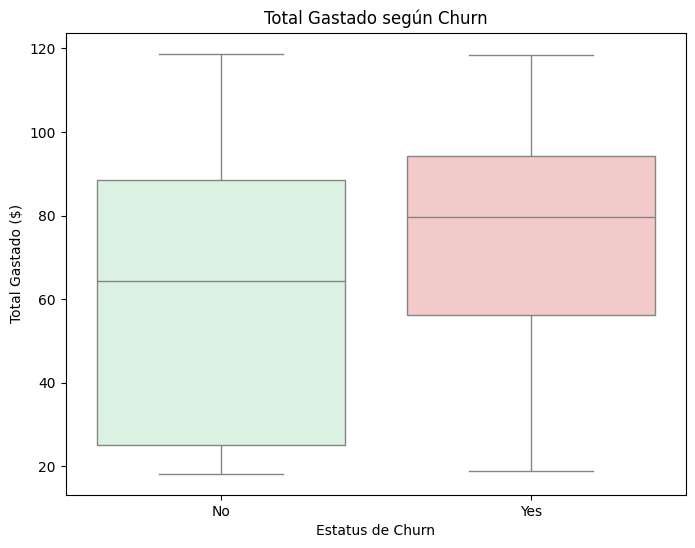

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account.Charges.Monthly',
            data=df,
            hue='Churn',
            palette=['#d7f5e0', '#f9c3c2'])  # tonos pastel
plt.title('Total Gastado según Churn')
plt.xlabel('Estatus de Churn')
plt.ylabel('Total Gastado ($)')
plt.show()

Clientes que gastan mucho pero se van pueden ser candidatos ideales para retención .
Puede haber correlación entre alto gasto y bajo valor percibido del servicio

# Distribución de Cuentas Diarias (Cuentas_Diarias)

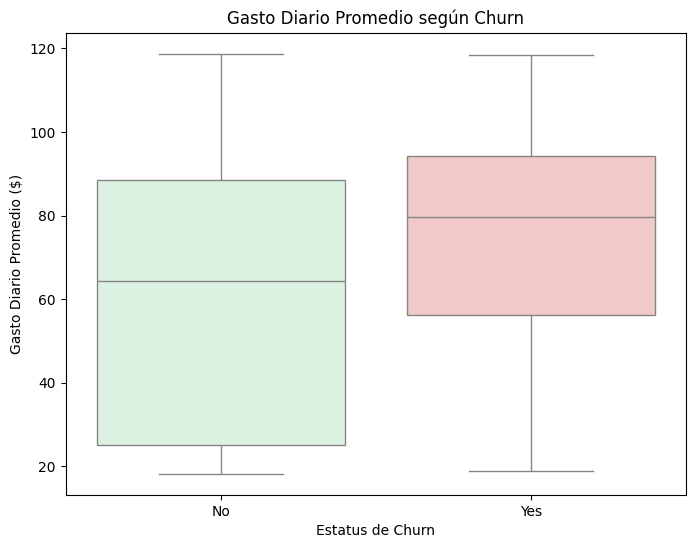

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account.Charges.Monthly',
            data=df,
            hue='Churn',
            palette=['#d7f5e0', '#f9c3c2'])
plt.title('Gasto Diario Promedio según Churn')
plt.xlabel('Estatus de Churn')
plt.ylabel('Gasto Diario Promedio ($)')
plt.show()

Gráfico 1: Distribución General de Churn

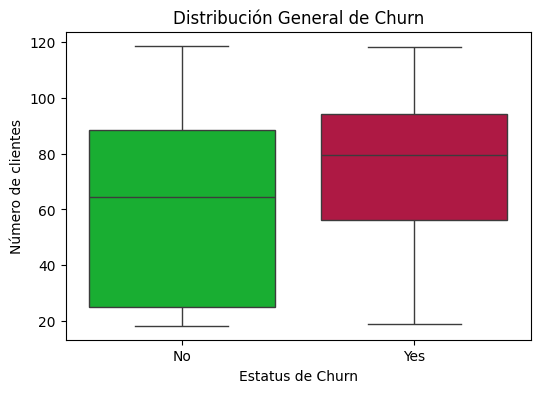

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn', y='account.Charges.Monthly',
            data=df,
            hue='Churn',
            palette=['#00c721', '#c70039'])
plt.title('Distribución General de Churn')
plt.xlabel('Estatus de Churn')
plt.ylabel('Número de clientes')
plt.show()

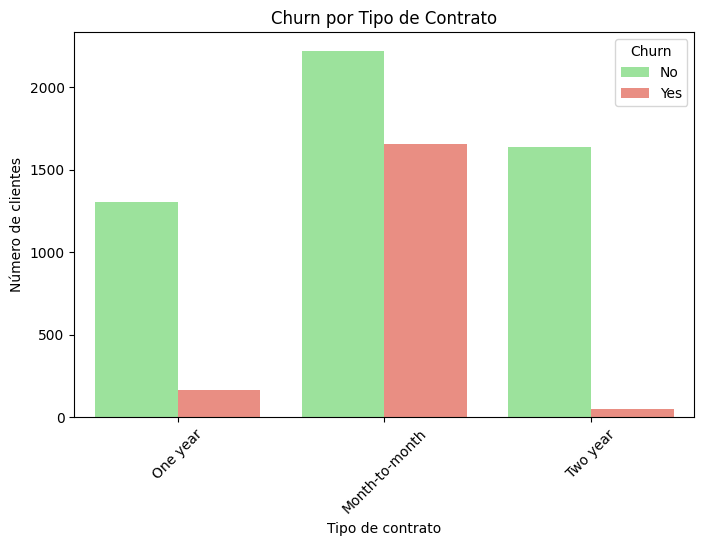

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='account.Contract', hue='Churn', data=df, palette=['lightgreen', 'salmon'])
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Número de clientes')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.show()

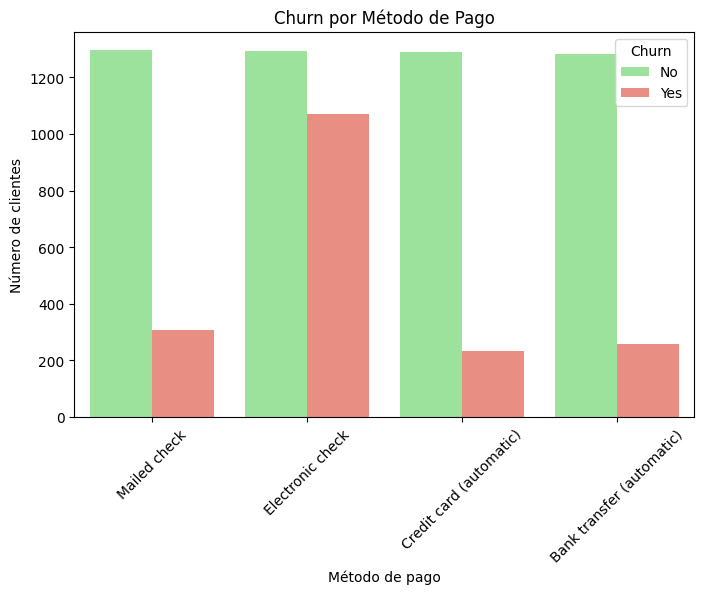

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='account.PaymentMethod', hue='Churn', data=df, palette=['lightgreen', 'salmon'])
plt.title('Churn por Método de Pago')
plt.xlabel('Método de pago')
plt.ylabel('Número de clientes')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.show()

In [ ]:
print(df.columns)

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Churn_bin',
       'Cuentas_Diarias'],
      dtype='object')


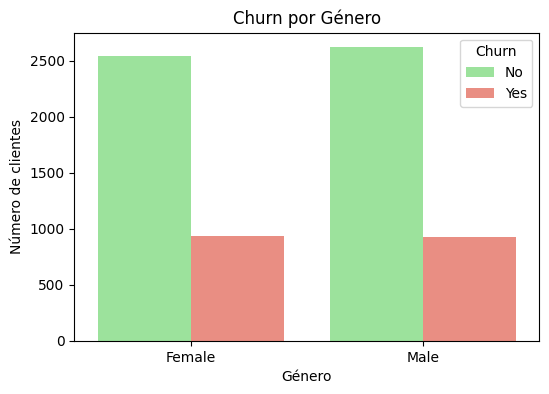

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='customer.gender', hue='Churn', data=df, palette=['lightgreen', 'salmon'])
plt.title('Churn por Género')
plt.xlabel('Género')
plt.ylabel('Número de clientes')
plt.legend(title='Churn')
plt.show()

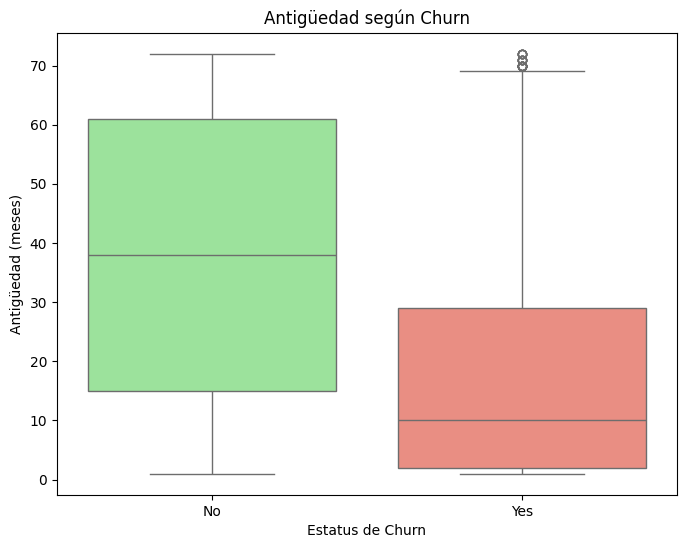

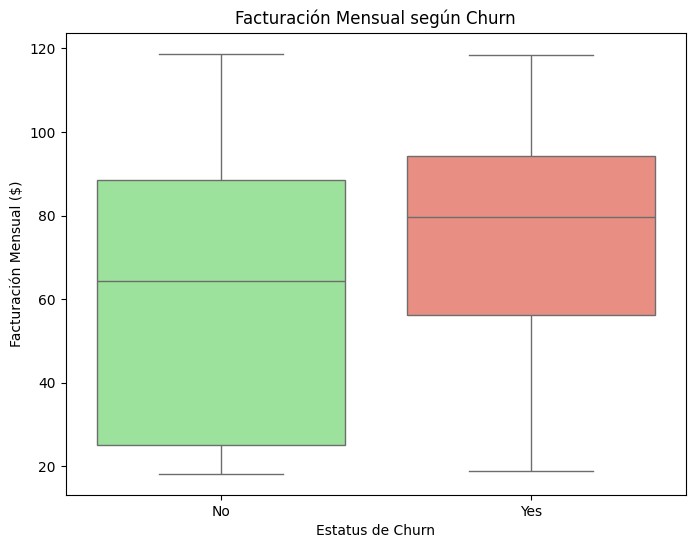

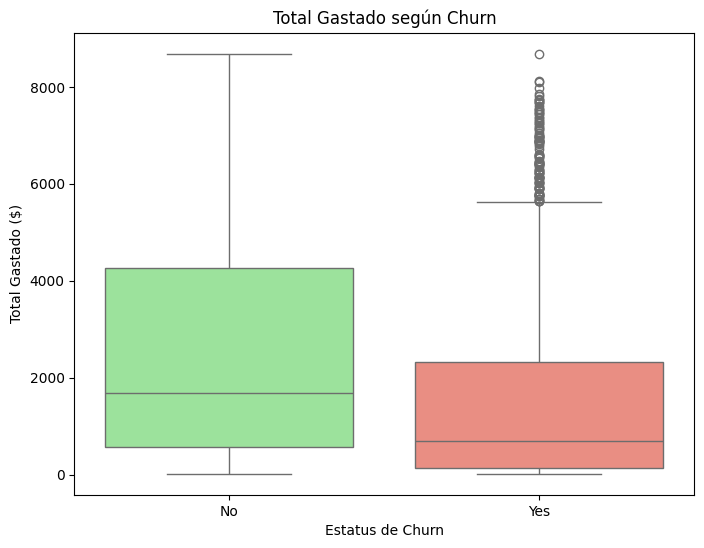

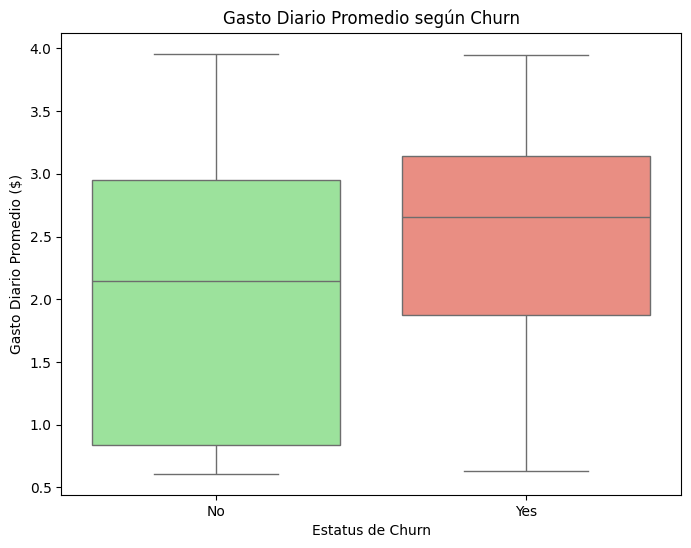

📊 Estadísticas resumidas por Churn:


customer.tenure               account.Charges.Monthly                \
                 mean median    std                    mean median    std   
Churn                                                                       
No              37.65   38.0  24.08                   61.31  64.45  31.09   
Yes             17.98   10.0  19.53                   74.44  79.65  24.67   

      account.Charges.Total                    
                       mean   median      std  
Churn                                          
No                  2555.34  1683.60  2329.46  
Yes                 1531.80   703.55  1890.82

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='customer.tenure',hue='Churn', data=df, palette=['lightgreen', 'salmon'])
plt.title('Antigüedad según Churn')
plt.xlabel('Estatus de Churn')
plt.ylabel('Antigüedad (meses)')
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account.Charges.Monthly', hue='Churn',data=df, palette=['lightgreen', 'salmon'])
plt.title('Facturación Mensual según Churn')
plt.xlabel('Estatus de Churn')
plt.ylabel('Facturación Mensual ($)')
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account.Charges.Total',hue='Churn', data=df, palette=['lightgreen', 'salmon'])
plt.title('Total Gastado según Churn')
plt.xlabel('Estatus de Churn')
plt.ylabel('Total Gastado ($)')
plt.show()
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Cuentas_Diarias',hue='Churn', data=df, palette=['lightgreen', 'salmon'])
plt.title('Gasto Diario Promedio según Churn')
plt.xlabel('Estatus de Churn')
plt.ylabel('Gasto Diario Promedio ($)')
plt.show()
print("📊 Estadísticas resumidas por Churn:")
df.groupby('Churn')[['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']].agg(['mean', 'median', 'std']).round(2)

#📄Informe final

🔹 Introducción

El problema de evolución de clientes , conocido como Churn , es uno de los desafíos más críticos en la industria de telecomunicaciones. La pérdida de clientes afecta directamente la rentabilidad y el crecimiento sostenible del negocio.

Este informe tiene como objetivo analizar el comportamiento de los clientes, identificar factores clave asociados al abandono del servicio y ofrecer recomendaciones basadas en datos para mitigar este fenómeno. El análisis se realizó sobre un conjunto de datos de clientes de TelecomX, con variables como:

* Facturación mensual y total
* Antigüedad en meses
* Tipo de contrato y método de pago
* Servicios contratados (Internet, Teléfono, etc.)
* Demografía básica

🔹 Limpieza y Tratamiento de Datos

Los datos fueron obtenidos desde un archivo JSON alojado públicamente en GitHub. Se utilizó requests para descargarlo y pandas para procesarlo.

🔹 Limpieza de Datos

Se realizaron las siguientes acciones:

* Eliminación de filas duplicadas.
* Conversión de columnas numéricas a tipo float.
* Manejo de valores nulos: eliminación de filas con valores faltantes.
* Normalización de categorías (Yes, No) y eliminación de espacios innecesarios.
* Creación de nueva variable: Cuentas_Diarias = account.Charges.Monthly / 30.


🔹 Análisis Exploratorio de Datos  EDA

## Conclusiones:
* El número de clientes que no abandonaron (No) supera claramente al de quienes lo hicieron (Yes).
* Esto sugiere un desbalanceo de clases que debe tenerse en cuenta si se construyen modelos predictivos.
 # Churn por Categorías:

 Los clientes con contratos anuales o bienales tienden a abandonar menos.
# Método de Pago:

* Algunos métodos de pago muestran mayor proporción de Churn.
* Por ejemplo, los clientes que pagan mediante tarjeta de crédito tienden a abandonar más.
#Churn vs Variables Numéricas:
* Los clientes que abandonan tienen menor antigüedad .
* La lealtad está inversamente correlacionada con el Churn.
#Facturación Mensual:
* Quienes abandonan tienden a pagar más por mes , lo que sugiere insatisfacción pese al gasto.
#Total Gastado:
* Clientes que gastan mucho pero se van son candidatos ideales para estrategias de retención .

Estos patrones reflejan que:

* La fidelidad y la percepción del valor del servicio están fuertemente ligadas al Churn.
* Clientes con contratos a corto plazo y facturación alta representan un grupo de alto riesgo.
* La retención de nuevos clientes debe ser priorizada, especialmente aquellos con menor tiempo de permanencia.

🔹 Recomendaciones
Basado en el análisis, se proponen las siguientes acciones estratégicas:

1. Fomentar Contratos a Largo Plazo
Ofrecer descuentos o beneficios adicionales a clientes que opten por contratos anuales o bienales.
Promover planes con bonificaciones por fidelidad .
2. Mejorar la Experiencia de Clientes Altamente Pagadores
Identificar clientes con alta facturación mensual y ofrecerles servicios personalizados o promociones exclusivas.
Analizar qué servicios estos clientes usan poco y mejorar su oferta.
3. Implementar Estrategias de Retención para Clientes Nuevos
Detectar clientes con menor antigüedad y ofrecerles programas de apoyo (ej: tutoriales, soporte técnico adicional).
Realizar encuestas de satisfacción tempranas.
4. Optimizar Métodos de Pago
Evaluar si ciertos métodos de pago (como pagos en efectivo o transferencias) están relacionados con mayor Churn.
Simplificar procesos de pago y mejorar la experiencia del usuario.
5. Desarrollar Modelos Predictivos de Churn
Usar las variables analizadas (tenencia, facturación, contrato) para entrenar modelos predictivos (regresión logística, árboles de decisión, etc.).
Predecir cuáles clientes están en riesgo de Churn y actuar preventivamente.

### El análisis de Churn ha revelado patrones claros que pueden ayudar a tomar decisiones estratégicas fundamentadas en datos. A través de la limpieza, visualización y exploración de las variables clave, se han identificado grupos de clientes con mayor riesgo de abandono, lo cual permite enfocar recursos en las áreas más críticas.

### La implementación de estas estrategias podría reducir significativamente la tasa de Churn, mejorando así la rentabilidad y la satisfacción del cliente .

## Resúmen

📊 Estadísticas descriptivas generales:
       customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
count             7032.000000      7032.000000              7032.000000   
mean                 0.162400        32.421786                64.798208   
std                  0.368844        24.545260                30.085974   
min                  0.000000         1.000000                18.250000   
25%                  0.000000         9.000000                35.587500   
50%                  0.000000        29.000000                70.350000   
75%                  0.000000        55.000000                89.862500   
max                  1.000000        72.000000               118.750000   

       account.Charges.Total  Cuentas_Diarias    Churn_bin  
count            7032.000000      7032.000000  7032.000000  
mean             2283.300441         2.159940     0.265785  
std              2266.771362         1.002866     0.441782  
min                18.800000         0.60

<ipython-input-4-2816973aa1ae>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette=['#a8dadc', '#f4a261'])


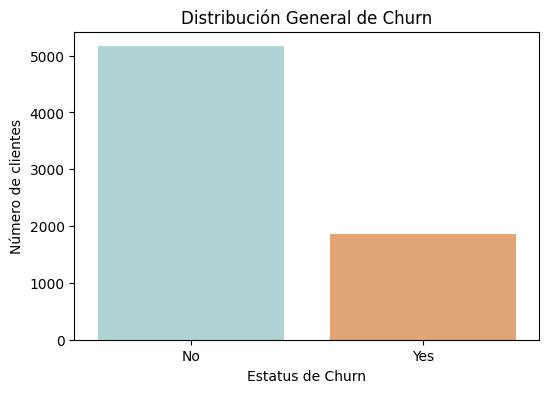

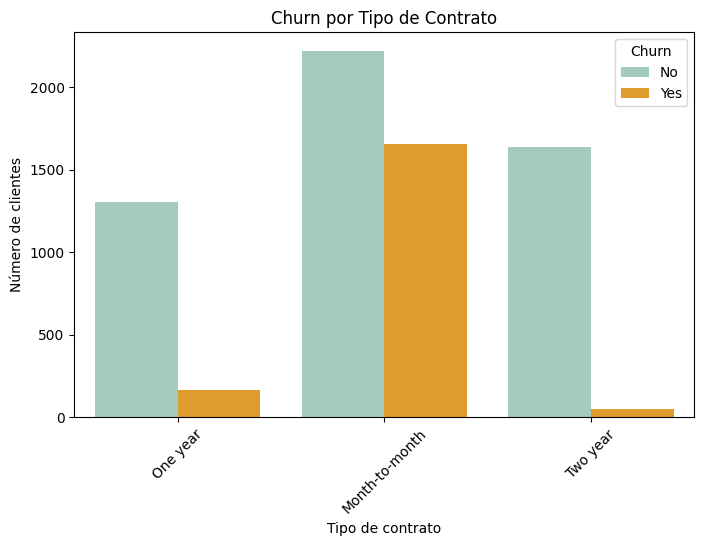

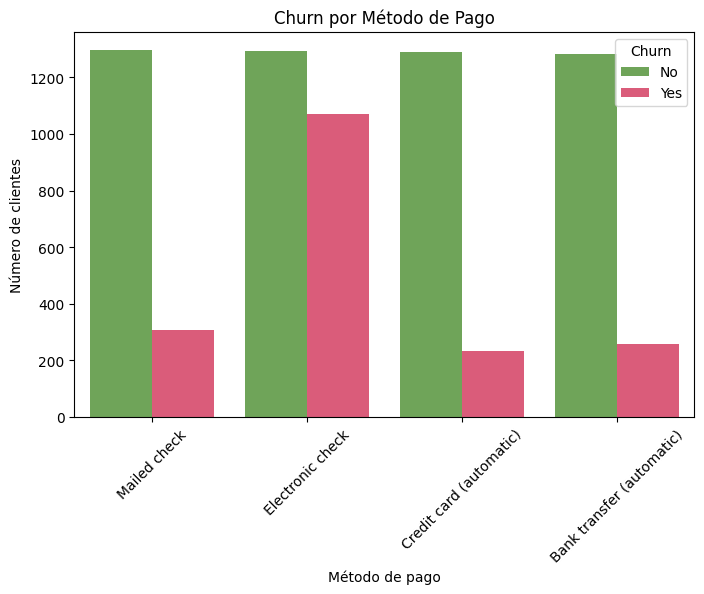

<ipython-input-4-2816973aa1ae>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='customer.tenure', data=df, palette=['#a8dadc', '#f4a261'])


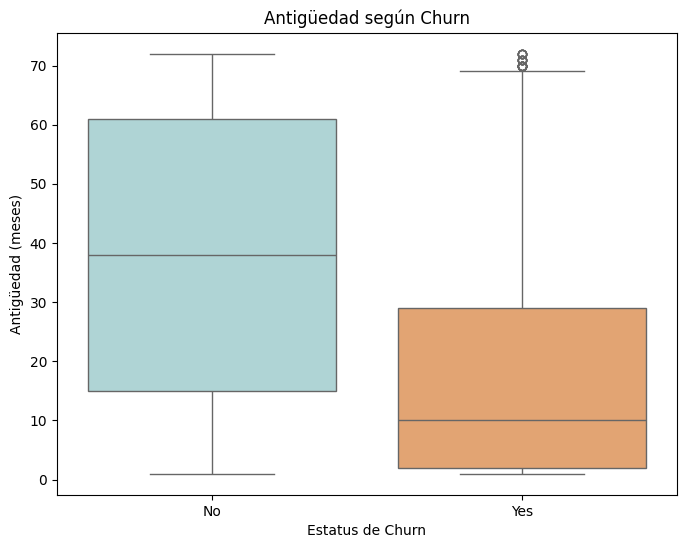

<ipython-input-4-2816973aa1ae>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='account.Charges.Monthly', data=df, palette=['#6ab04c', '#ef476f'])


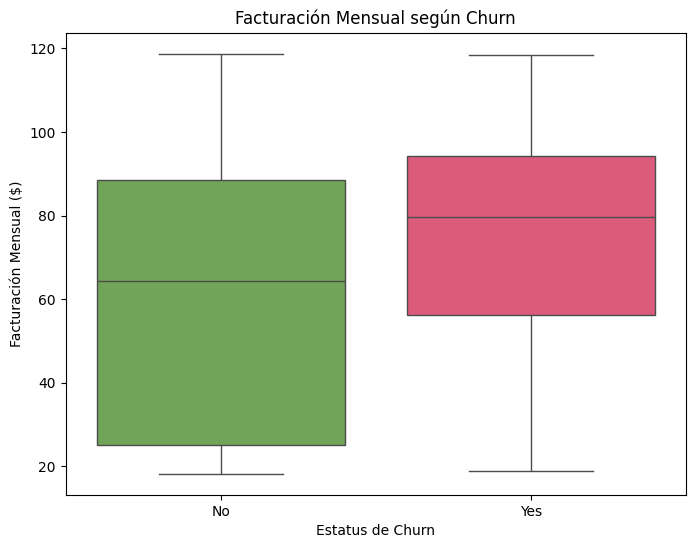

<ipython-input-4-2816973aa1ae>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='account.Charges.Total', data=df, palette=['#9dd1c0', '#fca311'])


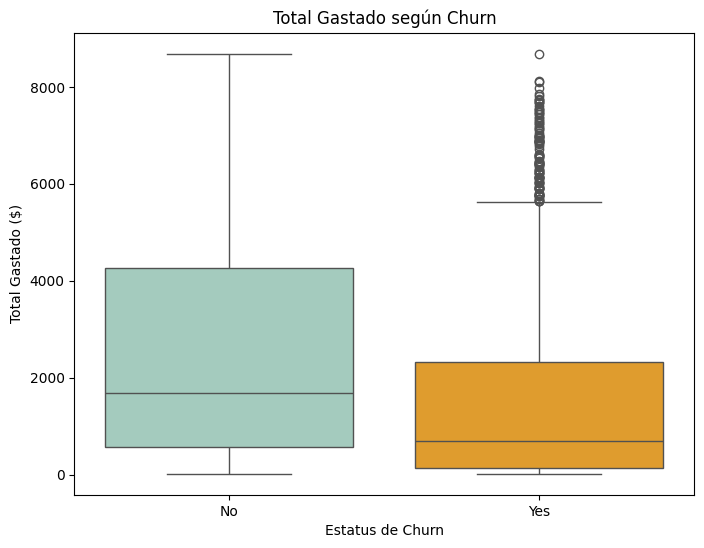

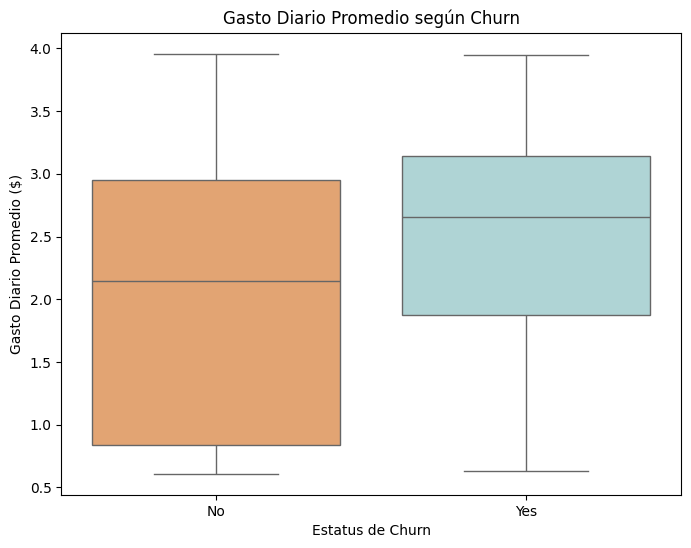


📊 Estadísticas resumidas por Churn:
      customer.tenure               account.Charges.Monthly                \
                 mean median    std                    mean median    std   
Churn                                                                       
No              37.65   38.0  24.08                   61.31  64.45  31.09   
Yes             17.98   10.0  19.53                   74.44  79.65  24.67   

      account.Charges.Total                    
                       mean   median      std  
Churn                                          
No                  2555.34  1683.60  2329.46  
Yes                 1531.80   703.55  1890.82  

 Conclusiones:

🔹 Los clientes que abandonan tienden a tener menor antigüedad.
🔹 Mayor facturación mensual y total se asocia con mayor riesgo de Churn.
🔹 Clientes con contratos anuales o bienales son más fidelizados.
🔹 Estrategias enfocadas en retención deben priorizar clientes nuevos y altamente pagadores.



In [ ]:
# Librerías necesarias
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

#  1. Importar los datos desde el JSON público
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()
df = pd.json_normalize(data)

# 2. Limpieza y transformación de datos
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30
df = df.drop_duplicates().dropna()

# Asegurar que Churn solo tenga "Yes" y "No"
valid_churn_values = ['Yes', 'No']
df = df[df['Churn'].isin(valid_churn_values)].copy()  # Filtrar filas inválidas

#  3. Preparar variable binaria para análisis estadístico
df['Churn_bin'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 4. Estadísticas descriptivas generales
print("📊 Estadísticas descriptivas generales:")
print(df.describe())

# 5. Gráfico: Distribución General de Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette=['#a8dadc', '#f4a261'])
plt.title('Distribución General de Churn')
plt.xlabel('Estatus de Churn')
plt.ylabel('Número de clientes')
plt.show()

#  6. Gráfico: Churn por Tipo de Contrato
plt.figure(figsize=(8, 5))
sns.countplot(x='account.Contract', hue='Churn', data=df, palette=['#9dd1c0', '#fca311'])
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Número de clientes')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.show()

#  7. Gráfico: Churn por Método de Pago
plt.figure(figsize=(8, 5))
sns.countplot(x='account.PaymentMethod', hue='Churn', data=df, palette=['#6ab04c', '#ef476f'])
plt.title('Churn por Método de Pago')
plt.xlabel('Método de pago')
plt.ylabel('Número de clientes')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.show()

#  8. Gráfico: Churn vs Antigüedad
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='customer.tenure', data=df, palette=['#a8dadc', '#f4a261'])
plt.title('Antigüedad según Churn')
plt.xlabel('Estatus de Churn')
plt.ylabel('Antigüedad (meses)')
plt.show()

# 9. Gráfico: Churn vs Facturación Mensual
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account.Charges.Monthly', data=df, palette=['#6ab04c', '#ef476f'])
plt.title('Facturación Mensual según Churn')
plt.xlabel('Estatus de Churn')
plt.ylabel('Facturación Mensual ($)')
plt.show()

# 10. Gráfico: Churn vs Total Gastado
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account.Charges.Total', data=df, palette=['#9dd1c0', '#fca311'])
plt.title('Total Gastado según Churn')
plt.xlabel('Estatus de Churn')
plt.ylabel('Total Gastado ($)')
plt.show()

#  11. Gráfico: Churn vs Cuentas Diarias
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Cuentas_Diarias',hue='Churn', legend=False, data=df, palette=['#f4a261', '#a8dadc'])
plt.title('Gasto Diario Promedio según Churn')
plt.xlabel('Estatus de Churn')
plt.ylabel('Gasto Diario Promedio ($)')
plt.show()

#  12. Tabla de Estadísticas Resumidas por Churn
print("\n📊 Estadísticas resumidas por Churn:")
print(df.groupby('Churn')[['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']].agg(['mean', 'median', 'std']).round(2))

# 13. Conclusión resumida
conclusion = """
🔹 Los clientes que abandonan tienden a tener menor antigüedad.
🔹 Mayor facturación mensual y total se asocia con mayor riesgo de Churn.
🔹 Clientes con contratos anuales o bienales son más fidelizados.
🔹 Estrategias enfocadas en retención deben priorizar clientes nuevos y altamente pagadores.
"""

print("\n Conclusiones:")
print(conclusion)